In [451]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [452]:
n = 30
V = np.linspace(1,n, n)
conv = np.sum(V)/n
print(conv)

15.5


En esta parte se crea la matriz de aduacencia considerando que $a_{ij} = a_{ji}$

In [453]:
def crear_matriz_adyacente(n,l):
    l = l+1
    

    matriz = np.zeros((n, n), dtype=int)  # Inicializar la matriz con ceros

    for i in range(n):
        for j in range(1,l):            
            if i+j > (n-1):
                matriz[i,i+j-n]=-1

            else:
                matriz[i,i+j]=-1

            matriz[i,i-j]=-1
        matriz[i,i] = -np.sum(matriz[i])
            
    return matriz   

En esta parte se desea determinar el tiempo

In [454]:
def tempo(A):
    for i in range(0, 10**4):
        columna = A[i, :]
        
        if np.all(np.round(columna,1) == round(columna[0],1)):    
            return(i)
            break
        elif i == 10**4-1:
            return(i)


En esta sección se realiza rugen kutta 4 para poder evidenciar el concensus

8.777877787778777


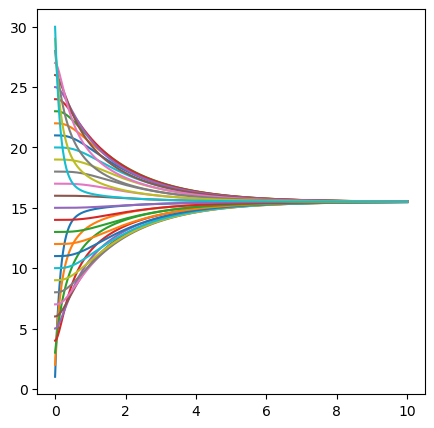

In [455]:
def solucionar(V,A):
    
    return -np.dot(A,V)
    
def RK4(t,y0,A,f):
    h = t[1]-t[0]
    y = [y0]
    

    for i in range (1, len(t)):
        k1 = f(y[i-1],A)
        k2 = f(y[i-1]+0.5*k1*h,A)
        k3 = f(y[i-1]+0.5*k2*h,A)
        k4 = f(y[i-1]+k3*h,A)
        
        y_ = y[i-1]+(h/6)*(k1+2*k2+2*k3+k4)
        y.append(y_)
    return np.array(y)
        

l = 3
V = np.linspace(1,n, n)
conv = np.sum(V)/n
A = crear_matriz_adyacente(n,l)    
t_1 = np.linspace(0,10, 10**4)        
y_1 = RK4(t_1, V, A, solucionar)



fig, axs = plt.subplots(1, 1, figsize=(5, 5))

for i in range(0,n):
    axs.plot(t_1, y_1[:,i])

i = tempo(y_1)
ts_1 = t_1[i]
print(t_1[i])

1.4425442544254425


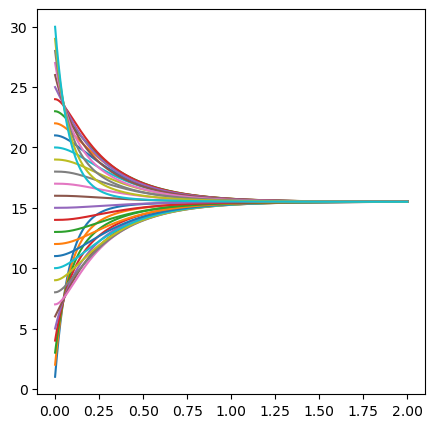

In [456]:
t_2 = np.linspace(0,2, 10**4)  

l = 6
V = np.linspace(1,n, n)
conv = np.sum(V)/n
A = crear_matriz_adyacente(n,l)     
y_2 = RK4(t_2, V, A, solucionar)


fig, axs = plt.subplots(1, 1, figsize=(5, 5))

for i in range(0,n):
    axs.plot(t_2, y_2[:,i])
    
    
i = tempo(y_2)
ts_2 = t_2[i]
print(ts_2)

9.814981498149814


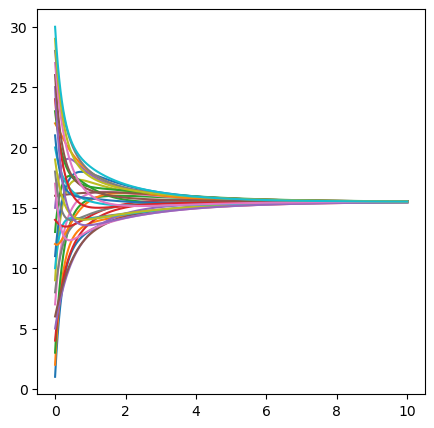

In [457]:
def creador_mundo(n,l):
    pool = []
    val = []
    for i in range(0,n):
        for j in range (0, l):
            pool.append(i+1)
    f = 0
    for i in range(0,1000):
        if f == l*n:
            break
        if len(pool) > 2:
            num_1, num_2 = random.sample(pool, 2)
        if len(pool) == 2:
            num_1 = pool[0]
            num_2 = pool[1]
        vect = [num_1, num_2]
        if (num_1 != num_2) & (vect not in val) & (vect[::-1] not in val):
            val.append(vect)
            pool.remove(num_1)
            pool.remove(num_2)
            f += 1
    matriz = np.zeros((n, n), dtype=int) 
    
    for i in val:
        matriz[i[0]-1, i[1]-1] = -1
        matriz[i[1]-1, i[0]-1] = -1
    
    
    for i in range(n):
        matriz[i,i] = -np.sum(matriz[i])
    return matriz
    
l = 3
t_3 = np.linspace(0,10, 10**4)  
A_1 = creador_mundo(n,l)
y_3 = RK4(t_3, V, A_1, solucionar)

fig, axs = plt.subplots(1, 1, figsize=(5, 5))
for i in range(0,n):
    axs.plot(t_3, y_3[:,i])
    
i = tempo(y_3)
ts_3 = t_3[i]
print(t_3[i])



2.0


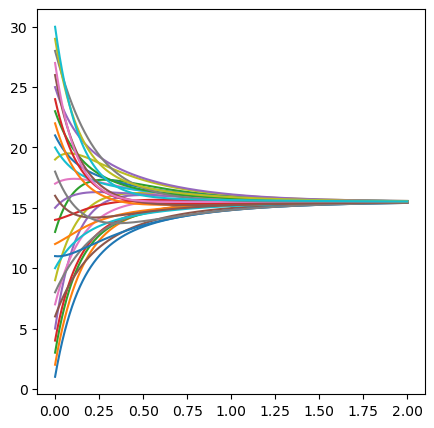

In [458]:
l = 6
t_4 = np.linspace(0,2, 10**4)  
A_1 = creador_mundo(n,l)
y_4 = RK4(t_4, V, A_1, solucionar)

fig, axs = plt.subplots(1, 1, figsize=(5, 5))
for i in range(0,n):
    axs.plot(t_4, y_4[:,i])
    
i = tempo(y_4)
ts_4 = t_4[i]
print(t_4[i])


Gráfica de todas

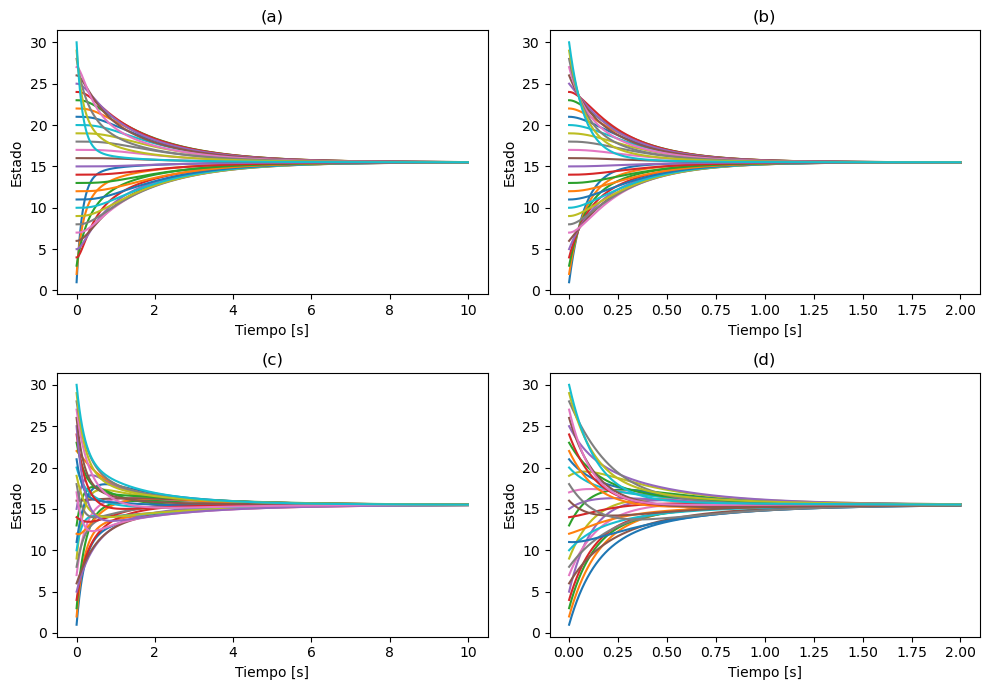

In [459]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

for i in range(0,n):
    axs[0,0].plot(t_1, y_1[:,i])
    axs[0,1].plot(t_2, y_2[:,i])
    axs[1,0].plot(t_3, y_3[:,i])
    axs[1,1].plot(t_4, y_4[:,i])
axs[0,0].set_xlabel("Tiempo [s]")
axs[0,1].set_xlabel("Tiempo [s]")
axs[1,0].set_xlabel("Tiempo [s]")
axs[1,1].set_xlabel("Tiempo [s]")

axs[0,0].set_ylabel("Estado")
axs[0,1].set_ylabel("Estado")
axs[1,0].set_ylabel("Estado")
axs[1,1].set_ylabel("Estado")

axs[0,0].set_title("(a)")
axs[0,1].set_title("(b)")
axs[1,0].set_title("(c)")
axs[1,1].set_title("(d)")


plt.tight_layout()

In [460]:
print(ts_1/ts_3)
print(ts_2/ts_4)
print(ts_1/ts_4)

0.8943346240065213
0.7212721272127213
4.388938893889389


Uno con valores aleatorios

-5.966666666666667


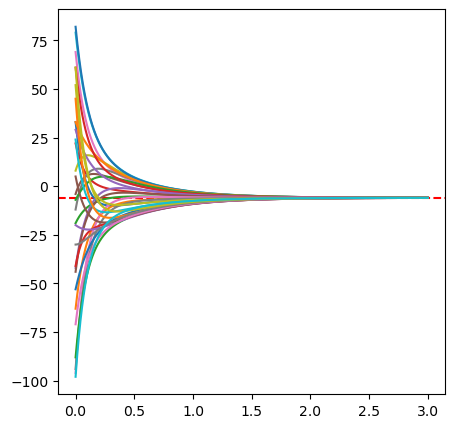

In [277]:
V = np.random.randint(-100, 101, size=30)
conv = np.sum(V)/n
print(conv)
A = crear_matriz_adyacente(n,l)     
y = RK4(t, V, A, solucionar)
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
axs.axhline(y=conv, color='r', linestyle='--')
for i in range(0,n):
    axs.plot(t, y[:,i])